In [ ]:
#load saved features 

import numpy as np

# Load saved features
X_combined = np.load("X_combined.npy")
y_combined = np.load("y_combined.npy")
label_map = np.load("label_map.npy", allow_pickle=True).item()

print("Features and labels loaded successfully.")
print("X_combined shape:", X_combined.shape)
print("y_combined shape:", y_combined.shape)
print("Number of classes:", len(label_map))


✅ Features and labels loaded successfully.
X_combined shape: (3230, 4366)
y_combined shape: (3230,)
Number of classes: 11


In [ ]:
#Stratified 5-Fold Cross-Validation with KNN

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Set number of folds and K for KNN
n_splits = 5
k_neighbors = 3

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
accuracies = []

fold = 1
for train_index, test_index in skf.split(X_combined, y_combined):
    X_train, X_test = X_combined[train_index], X_combined[test_index]
    y_train, y_test = y_combined[train_index], y_combined[test_index]

    # KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k_neighbors)
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)

    # Accuracy for this fold
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    print(f"\n📁 Fold {fold} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    fold += 1

# Average accuracy
print("===================================")
print(f"Average Accuracy across {n_splits} folds: {np.mean(accuracies):.4f}")
print("===================================")



📁 Fold 1 Accuracy: 0.9954
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        58
           5       1.00      1.00      1.00        54
           6       0.99      1.00      0.99        77
           7       0.98      0.98      0.98        55
           8       1.00      0.98      0.99        52
           9       1.00      0.99      0.99        69
          10       0.98      1.00      0.99        45

    accuracy                           1.00       646
   macro avg       1.00      1.00      1.00       646
weighted avg       1.00      1.00      1.00       646


📁 Fold 2 Accuracy: 0.9876
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       0.98 

In [3]:
#Save results 

# Optional: Save scores for your report
np.save("cv_accuracies.npy", accuracies)


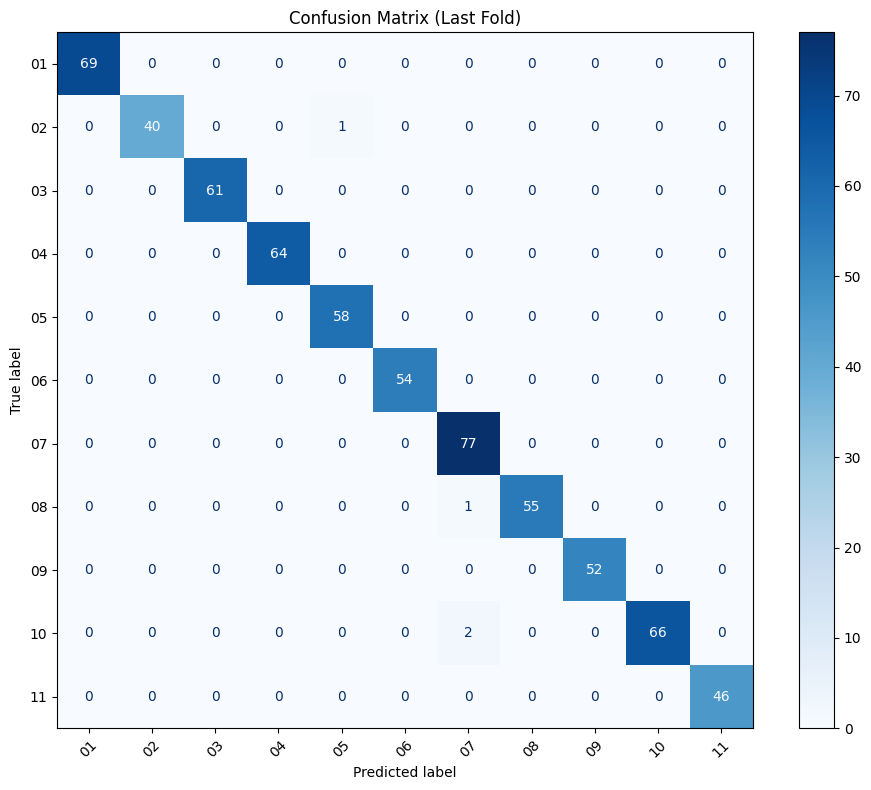

In [4]:
# Confusion Matrix (with Labels & Color)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix for the final fold's prediction (y_test vs y_pred from last fold)
cm = confusion_matrix(y_test, y_pred)

# Display with labels using your label_map
# Invert the label_map to get number → name
inv_label_map = {v: k for k, v in label_map.items()}
labels = [inv_label_map[i] for i in range(len(inv_label_map))]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix (Last Fold)")
plt.tight_layout()
plt.show()


In [ ]:
#Decision tree classifier using k fold

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load your saved features
# X_combined = np.load("X_combined_denoised.npy")
# y_combined = np.load("y_combined_denoised.npy")

# Train using Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dtree = DecisionTreeClassifier(max_depth=10, random_state=42)

accuracies = []
fold = 1
for train_idx, test_idx in skf.split(X_combined, y_combined):
    X_train, X_test = X_combined[train_idx], X_combined[test_idx]
    y_train, y_test = y_combined[train_idx], y_combined[test_idx]
    
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"📁 Fold {fold} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    accuracies.append(acc)
    fold += 1

print("===================================")
print(f"Average Accuracy across 5 folds: {np.mean(accuracies):.4f}")
print("===================================")


📁 Fold 1 Accuracy: 0.8204
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        69
           1       0.82      0.88      0.85        42
           2       0.96      0.75      0.84        61
           3       0.98      0.84      0.91        64
           4       1.00      0.76      0.86        58
           5       0.93      0.93      0.93        54
           6       0.94      0.79      0.86        77
           7       0.95      0.71      0.81        55
           8       0.95      0.75      0.84        52
           9       0.98      0.80      0.88        69
          10       0.31      0.89      0.45        45

    accuracy                           0.82       646
   macro avg       0.89      0.82      0.84       646
weighted avg       0.91      0.82      0.85       646

📁 Fold 2 Accuracy: 0.8204
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        69
           1       0.88   

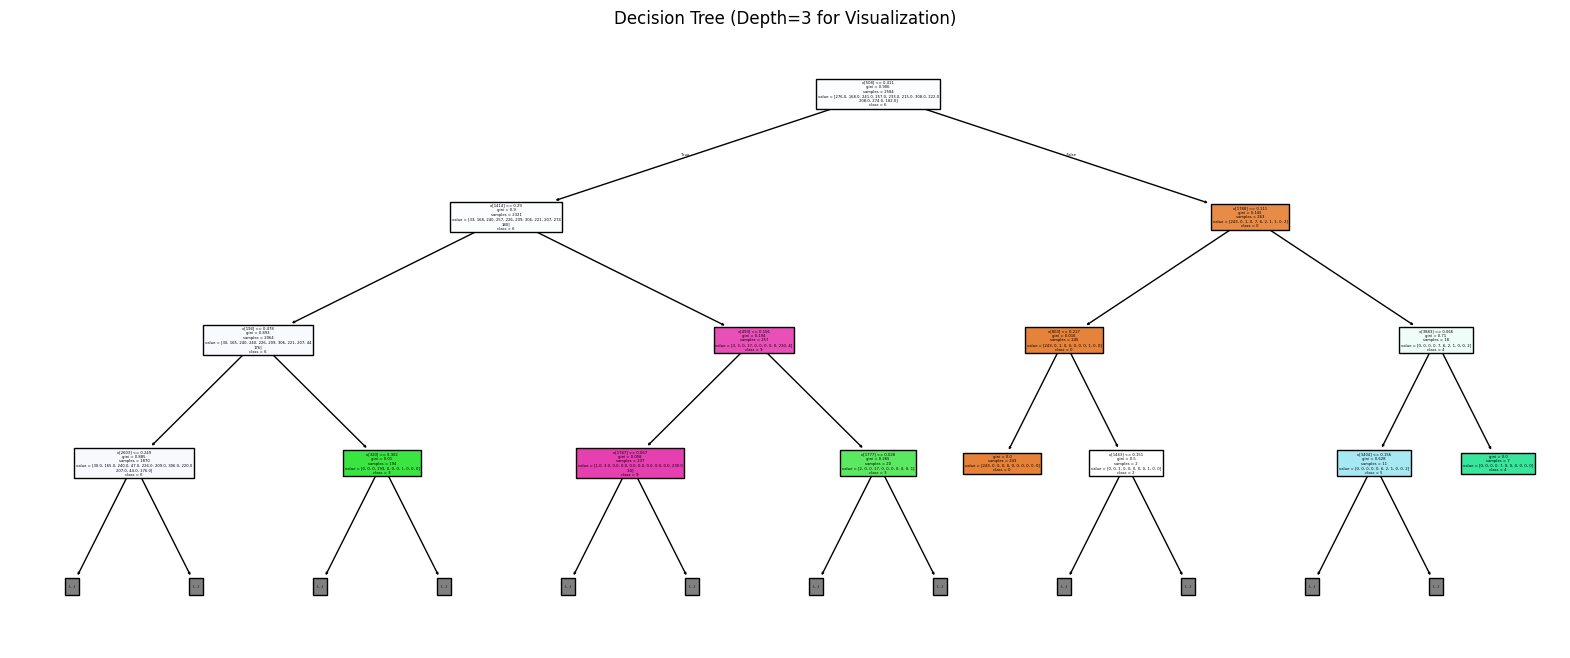

In [6]:
# Plot the final trained decision tree from last fold
plt.figure(figsize=(20, 8))
plot_tree(dtree, filled=True, max_depth=3, feature_names=None, class_names=[str(i) for i in np.unique(y_combined)])
plt.title("Decision Tree (Depth=3 for Visualization)")
plt.show()


In [ ]:
#trace decision path for one prediction 

# Select any test sample (you can change this)
sample_idx = 10
sample = X_combined[sample_idx].reshape(1, -1)

predicted_label = dtree.predict(sample)[0]
print("Predicted Label:", predicted_label)

# Get decision path
node_indicator = dtree.decision_path(sample)
feature = dtree.tree_.feature
threshold = dtree.tree_.threshold

print("\n Decision Path:")
for node_id in node_indicator.indices:
    if sample[0, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"
    
    print(f"Node {node_id}: (Feature[{feature[node_id]}] = {sample[0, feature[node_id]]:.4f}) "
          f"{threshold_sign} {threshold[node_id]:.4f}")


Predicted Label: 0

🔎 Decision Path:
Node 0: (Feature[508] = 0.6093) > 0.4111
Node 96: (Feature[1788] = 0.0244) <= 0.1106
Node 97: (Feature[803] = 0.0119) <= 0.2170
Node 98: (Feature[-2] = 0.0279) > -2.0000
